In [1]:
import pydataset

In [2]:
df= pydataset.data("iris")

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid
from matplotlib import cm
from sklearn.metrics import accuracy_score

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Species'])

In [6]:
df['Species'] = labels

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [7]:
X = df[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
y = df[['Species']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

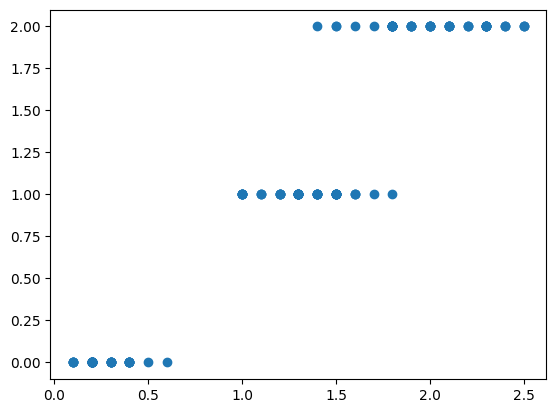

In [8]:
plt.scatter(df['Petal.Width'], df['Species'])

plt.show()

In [9]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knnModel.score(x_test, y_test)

0.9666666666666667

## 1.RELU


In [11]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = Sequential()

#ADD FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYERS WILL BE ADDED AUTOAMTICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))


#ADDING OUTPUT LAYER WITH 1 NEURON, AS THIS IS BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [12]:
#now testing for Test data 
y_pred = ann.predict(x_test)
#converting values
y_pred = (y_pred>0.5)


1/1 [==============================] - 0s 166ms/step


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
score1 = accuracy_score(y_test,y_pred)
print(cm)
print("score is",score1)

[[ 0  8  0]
 [ 0 11  0]
 [ 2  9  0]]
score is 0.36666666666666664


In [14]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.39      1.00      0.56        11
           2       0.00      0.00      0.00        11

    accuracy                           0.37        30
   macro avg       0.13      0.33      0.19        30
weighted avg       0.14      0.37      0.21        30



<AxesSubplot: >

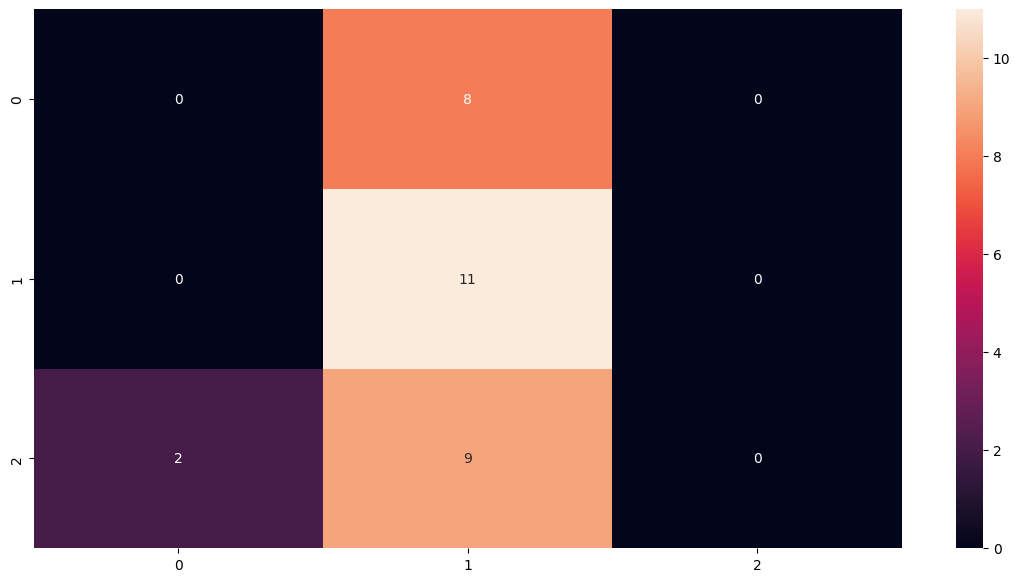

In [15]:
# creating heatmap of confusion matrix 
import seaborn as sns
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot = True)

In [16]:
from tensorflow.keras.layers import BatchNormalization

# creating the ann as sequence of layers

ann = Sequential()

#adding first hidden layer with 30 neurons,the input layer will be added automatically

ann.add(Dense(units=30,activation='softmax'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# adding output layer with 1 neuron, as this a binary classification

ann.add(Dense(units=1,activation='sigmoid'))

In [20]:
#compiling the ann using stochastic gradient descent (optimizer - adam)

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#setting callback for monitoring maximum accuracy

from tabnanny import verbose
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

#training the ann with batch size of 32 (this is a batch learning)

model = ann.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=100,callbacks=[early_stop])

Epoch 1/100
4/4 [==============================] - 1s 89ms/step - loss: -22.3801 - accuracy: 0.6333 - val_loss: -22.9537 - val_accuracy: 0.6333
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: -22.3966 - accuracy: 0.6667 - val_loss: -23.1327 - val_accuracy: 0.6333
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: -21.3800 - accuracy: 0.6500 - val_loss: -23.3005 - val_accuracy: 0.6333
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: -20.8542 - accuracy: 0.6667 - val_loss: -23.4890 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: -21.9464 - accuracy: 0.6667 - val_loss: -23.6465 - val_accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: -18.8751 - accuracy: 0.5917 - val_loss: -23.9315 - val_accuracy: 0.6333
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: -21.3218 - accuracy: 0.6583 - val_loss: -24.1601 - val_accuracy:

In [21]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESENT(optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#SETTING CALLBACKS FOR MONITERING MAXIMUM ACCURACY
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)



In [22]:
#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
from keras import callbacks


model=ann.fit(x_train,y_train,batch_size = 32, validation_data=(x_test,y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
4/4 [==============================] - 1s 56ms/step - loss: -36.2671 - accuracy: 0.6000 - val_loss: -43.3580 - val_accuracy: 0.6333
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: -38.9427 - accuracy: 0.5333 - val_loss: -43.3991 - val_accuracy: 0.6333
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: -37.1145 - accuracy: 0.5833 - val_loss: -43.6016 - val_accuracy: 0.6333
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: -37.4009 - accuracy: 0.6250 - val_loss: -43.8418 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: -37.8797 - accuracy: 0.5667 - val_loss: -44.1076 - val_accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: -41.0771 - accuracy: 0.6083 - val_loss: -44.2889 - val_accuracy: 0.6333
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: -37.4311 - accuracy: 0.6000 - val_loss: -44.3829 - val_accuracy: